# Data collection method 

### Collecting fire images 

The secondary source fire image dataset used in this project are primarily from the following links: 

https://drive.google.com/file/d/11KBgD_W2yOxhJnUMiyBkBzXDPXhVmvCt/view

https://www.kaggle.com/phylake1337/fire-dataset

https://github.com/cair/Fire-Detection-Image-Dataset/find/master

The first dataset contains 1405 images of fires. There are mostly urban fire and few wild fire. But the data is not cleaned. It contains many images without fire: site before and after fire, fire fighters and their equipment only, map of the area of fire, cartoon of fire etc. So the data cleaning has been done. All the black and white images are removed. All images without fire or smoke are removed. All the repeated images had been removed. It was a challenge whether or not to keep the picture involving fire damage and lots of ash. Ash might be the indication that there was a fire. But as a fire dectedion tool there might be little interest on the post damage picture. So I decided to remove those images as well. After removing all the irrelevant images we retin 768 images in our dataset. In total I removed 637 images from the dataset. Which is all human labor. 

 

The second dataset contains 755 images containing fire and 244 images without fire. Clearly, there is disparity in number of images in two categories. Also, the fire images mostly contains wild fire and few urban fire. However, the non-fire images are mostly forest images. The significant amount of fire images are taken at night while the non-fire images are taken on day. So, non-fire dataset is not representative. So, I use non-fire dataset from other sources to make it more representative. Throught this project JEPG image with RGB fromat is chosen as default. The fire images in this dataset are in .png format. So conversion was necessary to merge into the final dataset. The labels were all correct in this set but there were few duplicate images. After removing all the duplicates there are 717 fire images. 


Third dataset contains 110 fire images. No cleaning is done in this dataset. So we have 1595 fire images in total. 

Limitations of the dataset. 
- There are no indoor fire images. 
- There are no road/highway/vehicle fire images. 

### Collecting non-fire images


I use this dataset for the non-fire images.  

https://people.csail.mit.edu/torralba/code/spatialenvelope/

There are 2688 images in various categories: coast, forest, highway, city, mountain, land, street, tall building etc and their subcategories. 

But almost all images are taken at day. This produce the risk, especially for night images with urban artificial light to mis-classify as fire images. So, I need another dataset containing night images without fire. 

Night images are taken from 

https://www.visuallocalization.net/datasets/

These are all urban night image. There are 93 such images. 


Limitations

- there are no not sufficuent night images. 
- Night images are not diverse: forest, highway etc. 


## Importing packages 

In [21]:
import os                         # For operating system 
import shutil                     # High-level file operations
import random                     # For random number generation 
import glob                       # Unix style pathname pattern expansion
import cv2                        # Image processing 
from PIL import Image             # Python Image Library 
import matplotlib.pyplot as plt   # Making plots 
import matplotlib.image as mpimg  # To view color image 
%matplotlib inline                # View images inline 

## Preparing directories and path 

In [2]:
# Base directroy where dataset is stored locally 
base_dir = 'D:/Projects/Fire_detection'

# Collecting all folders containing fire and non-fire images 
src_fire = glob.glob(base_dir + '/Fire_set_*')
src_nofire = glob.glob(base_dir + '/Nofire_set_*')

# Directories to store combined fire dataset and non-fire dataset 
dst_fire = os.path.join(base_dir, 'fire_images')
dst_nofire = os.path.join(base_dir, 'nofire_images')

# Makeing directories if they are not there already. 
if not os.path.exists(dst_fire):
    os.makedirs(dst_fire)

if not os.path.exists(dst_nofire):
    os.makedirs(dst_nofire)

## Function to copy file from folder to another folder 

In [3]:
def copy_file(src_path, dst_path, shuffle=False, no_modify=True, \
              start_index=None, end_index=None):
    
    '''This function copies files from src_path to dst_path.
    It copies files from start_index to end_index.
    shuffling can be activated to copy random files
    rather than first in the list.
    If modify=True, This function converts images to 
    RGB format and .jpg type before copying if they 
    are not already.'''
    
    # All files in src_path
    src_files = os.listdir(src_path)
    
    # Shuffle files before copying 
    if shuffle==True:
        random.shuffle(src_files)
    
    # Prepare directory to copy files 
    os.chdir(dst_path)
    
    # Copy from source to destination    
        
    for fname in src_files[start_index : end_index]:
        src = os.path.join(src_path, fname)
        
        if no_modify:
            dst = os.path.join(dst_path, fname)
            shutil.copyfile(src, dst)
  
        # option to change file format and extension etc.
        else:
            img = Image.open(src)  
            
            # Convert all images in RGB mode 
            if img.mode != 'RGB':
                # PIL cannot convert P to RGB directly. 
                if img.mode == 'P':    
                    img = img.convert('RGBA').convert('RGB')
                else: 
                    img = img.convert('RGB')

            # Convert all images in .jpg format 
            if fname.endswith('.jpg'):
                dst = os.path.join(dst_path, fname)
                shutil.copyfile(src, dst)
            else:
                fn, fext = os.path.splitext(fname)
                img.save('{}.jpg'.format(fn))

## Collecting all fire and non-fire images together 

I want to include all the night images to the non-fire image set but only 1557 day images to match the toal to the fire images of 1650. Since, there are sub-categories non day images I would shuffle the list before copying to the destination folder. There is no need to shuffle in other case because we are copying all the images from there. 

In [4]:
copy_file(src_fire[0], dst_fire, no_modify=False)
copy_file(src_fire[1], dst_fire, no_modify=False)
copy_file(src_fire[2], dst_fire, no_modify=False)

In [9]:
# os.chdir(src_nofire[0])
# os.remove('Thumbs.db')

In [15]:
copy_file(src_nofire[0], dst_nofire, shuffle=True,\
          no_modify=False, end_index=1600)

## Shuffling and re-naming images 

And finally we want to shuffle the files in final destination and rename them appropriately. This is necessary because we are going to separate the fiels in the train and test set and shuffling makes the separation more representative. 

In [16]:
def file_rename(path, name):
    
    '''This functions renames all the .jpg 
    files in path in name.#.jpg format. 
    name should be passed as string. 
    Files are shuffled before renaming.'''
    
    files = os.listdir(path)
    random.shuffle(files)
    
    for index, file in enumerate(files):
        src = os.path.join(path, file)
        dst = os.path.join(path, ''.join([name,'.', str(index + 1), '.jpg']))
        os.rename(src, dst)

In [18]:
# Renaming files 
file_rename(dst_fire, 'fire')
file_rename(dst_nofire, 'nofire')

## Train and test directory 

Next we separate the training and test data. I will take 1250 images from each category as training set and 400 images from ech as test set. So in total there are 2500 training images and 800 test images. We did not make the validation directory. We can use Keras inbuild validation separation functionality. 

In [19]:
# make train directories 
train_dir = os.path.join(base_dir, 'train')

train_dir_fire = os.path.join(train_dir, 'fire')
if not os.path.exists(train_dir_fire):
    os.makedirs(train_dir_fire)
    
train_dir_nofire = os.path.join(train_dir, 'nofire')
if not os.path.exists(train_dir_nofire):
    os.makedirs(train_dir_nofire)

# make test directories 
test_dir = os.path.join(base_dir, 'test')

test_dir_fire = os.path.join(test_dir, 'fire')
if not os.path.exists(test_dir_fire):
    os.makedirs(test_dir_fire)
    
test_dir_nofire = os.path.join(test_dir, 'nofire')
if not os.path.exists(test_dir_nofire):
    os.makedirs(test_dir_nofire)

In [20]:
# Two-third is for training and one-third is for testing 
n_23 = 2 * len(os.listdir(dst_fire)) // 3

# Copying train images 
copy_file(dst_fire, train_dir_fire, end_index=n_23)
copy_file(dst_nofire, train_dir_nofire, end_index=n_23)

# Copying test images 
copy_file(dst_fire, test_dir_fire, start_index=n_23)
copy_file(dst_nofire, test_dir_nofire, start_index=n_23)

## Data visualizations 

This function helps to visualize images in test and train set in various categories 

In [110]:
def image_collage(path, n_rows, n_cols, title):
    
    fig = plt.figure()
    plt.title(title)
    plt.axis('Off')
    
    img_list = os.listdir(path)

    img_num = 1
    for img in img_list[:n_rows*n_cols]:
        img_path = os.path.join(path, img)
        img_read = mpimg.imread(img_path)

        ax = fig.add_subplot(n_rows, n_cols, img_num)
        ax.imshow(img_read)
        ax.axis('Off')
        img_num += 1

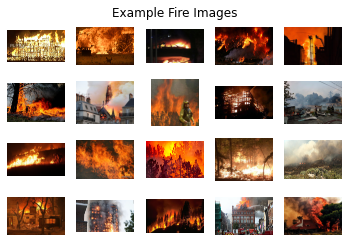

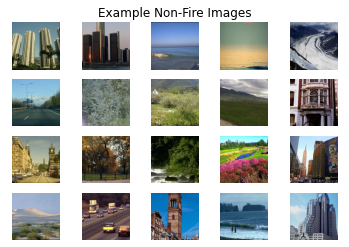

In [119]:
image_collage(train_dir_fire, 4, 5, 'Example Fire Images')
image_collage(train_dir_nofire, 4, 5, 'Example Non-Fire Images')

## Future direction 

Scrap data in the following categories: 

- Highway fire, road fire  
- Night road, night city, night forest, night mountain 
